# Network Analysis Lab

Complete the following exercises to help solidify your understanding of network analysis.

In [25]:
import networkx as nx
import community.community_louvain as cl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import nxviz as nv

In [4]:
# !pip install nxviz 

## U.S. Mens Basketball Data Set

In the `us_mens_basketball.csv` data set, each row represents an single basketball player's participation in a single event at a single Olympics. 

In [5]:
basketball = pd.read_csv('../data/us_mens_basketball.csv')

In [6]:
basketball.head(2)
# There are 222 rows and 15 cols

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold


## 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

Sort descending by the number of pairwise interactions. Which pair of players have competed in the most Olympics together?

In [7]:
basketball['Games'].dtypes

dtype('O')

In [8]:
def df_to_graph(df, entity, edge):
    df2 = df.copy()
    graph_df = pd.merge(df, df2, how='inner', on=edge)
    graph_df = graph_df.groupby([entity + '_x', entity + '_y']).count().reset_index()
    graph_df = graph_df[graph_df[entity + '_x'] != graph_df[entity + '_y']]
    
    if type(edge) == list:
        graph_df = graph_df[[entity + '_x', entity + '_y'] + edge]
    else:
        graph_df = graph_df[[entity + '_x', entity + '_y', edge]]
    
    return graph_df

In [9]:
graph_df=df_to_graph(basketball, 'Name', 'Games')
# 2464 rows × 3 columns result

graph_df.sort_values(by='Games', ascending=False).head()

,Name_x,Name_y,Games
1557,LeBron Raymone James,Carmelo Kyan Anthony,3
282,Carmelo Kyan Anthony,LeBron Raymone James,3
1347,Karl Malone,Charles Wade Barkley,2
1487,Kobe Bean Bryant,LeBron Raymone James,2
429,"Christopher Paul ""Chris"" Mullin",Michael Jeffrey Jordan,2


## 2. Use the `from_pandas_edgelist` method to turn the data frame into a graph.

In [10]:
G = nx.from_pandas_edgelist(graph_df, 'Name_x', 'Name_y')

## 3. Compute and print the following graph statistics for the graph:

- Number of nodes
- Number of edges
- Average degree
- Density

> ### Number of nodes

In [11]:
print(G.number_of_nodes())
print(len(G.nodes()))

196
196


> ### Number of edges


In [12]:
print(G.number_of_edges())
print(G.size())
print(len(G.edges()))

1232
1232
1232


> ### Average degree

The average degree of the graph tells you the average number of nodes that can be reached from a node in the graph and is a measure of how connected your graph is. We can retrieve the degree for each node in a graph by calling the degree method, so obtaining the average degree is just a matter of summing up all the degree values and then dividing by the number of nodes in the graph.

In [13]:
print(sum(dict(G.degree()).values())/G.order())

12.571428571428571


> ### Density

In [14]:
print(nx.density(G))

0.06446886446886448


## 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.
<br>
Betweenness centrality tells us which nodes in our network are likely pathways for information. 

In [15]:
betweenness = nx.betweenness_centrality(G, weight='edge')
# ceci est un dictionnaire

In [16]:
sorted_x = sorted(betweenness.items(), key=lambda kv: kv[1], reverse=True)

print(sorted_x[0:5])
# get the list of tuples from sorted dictionnary

[('Gary Dwayne Payton', 0.09193761564895586), ('Jason Frederick Kidd', 0.09135606661379858), ('Carmelo Kyan Anthony', 0.04742268041237115), ('David Maurice Robinson', 0.03266190853819722), ('William Marion "Bill" Hougland', 0.030240549828178694)]


## 5. Compute Eigenvector centrality for the graph and print the top 5 nodes with the highest centrality.
**Eigenvector centrality measures related influence or who is closest to the most important nodes in the network**

In [17]:
eigenvector = nx.eigenvector_centrality_numpy(G)

In [18]:
# Method 1
sorted_x = sorted(eigenvector.items(), key=lambda kv: kv[1], reverse=True)
print(sorted_x[0:5])

[('Carmelo Kyan Anthony', 0.34185005667190543), ('LeBron Raymone James', 0.2884535214315874), ('Christopher Emmanuel "Chris" Paul', 0.22431681558531147), ('Kobe Bean Bryant', 0.22431681558531147), ('Deron Michael Williams', 0.22431681558531139)]


In [19]:
## Method 2 from the lab-solutions; as a df sorting
eigenvector = pd.DataFrame.from_dict(eigenvector, orient='index').reset_index()
eigenvector.columns = ['Node', 'Centrality']
eigenvector.sort_values('Centrality', ascending=False).head()

,Node,Centrality
53,Carmelo Kyan Anthony,0.341850
57,LeBron Raymone James,0.288454
76,"Christopher Emmanuel ""Chris"" Paul",0.224317
81,Kobe Bean Bryant,0.224317
77,Deron Michael Williams,0.224317


## 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.

In [20]:
degree = nx.degree_centrality(G)

In [21]:
sorted_x = sorted(degree.items(), key=lambda kv: kv[1], reverse=True)

print(sorted_x[0:5])

[('Carmelo Kyan Anthony', 0.18461538461538463), ('David Maurice Robinson', 0.14358974358974358), ('Robert Albert "Bob" Kurland', 0.13333333333333333), ('LeBron Raymone James', 0.13333333333333333), ('William Marion "Bill" Hougland', 0.12307692307692308)]


## 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

C:\Users\eleouetd01\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


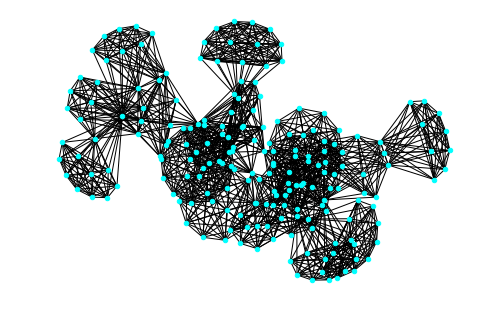

In [21]:
nx.draw_kamada_kawai(G, node_size=20, node_color='cyan')
# C:\Users\eleouetd01\AppData\Roaming\Python\Python37\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number) if cb.is_numlike(alpha):

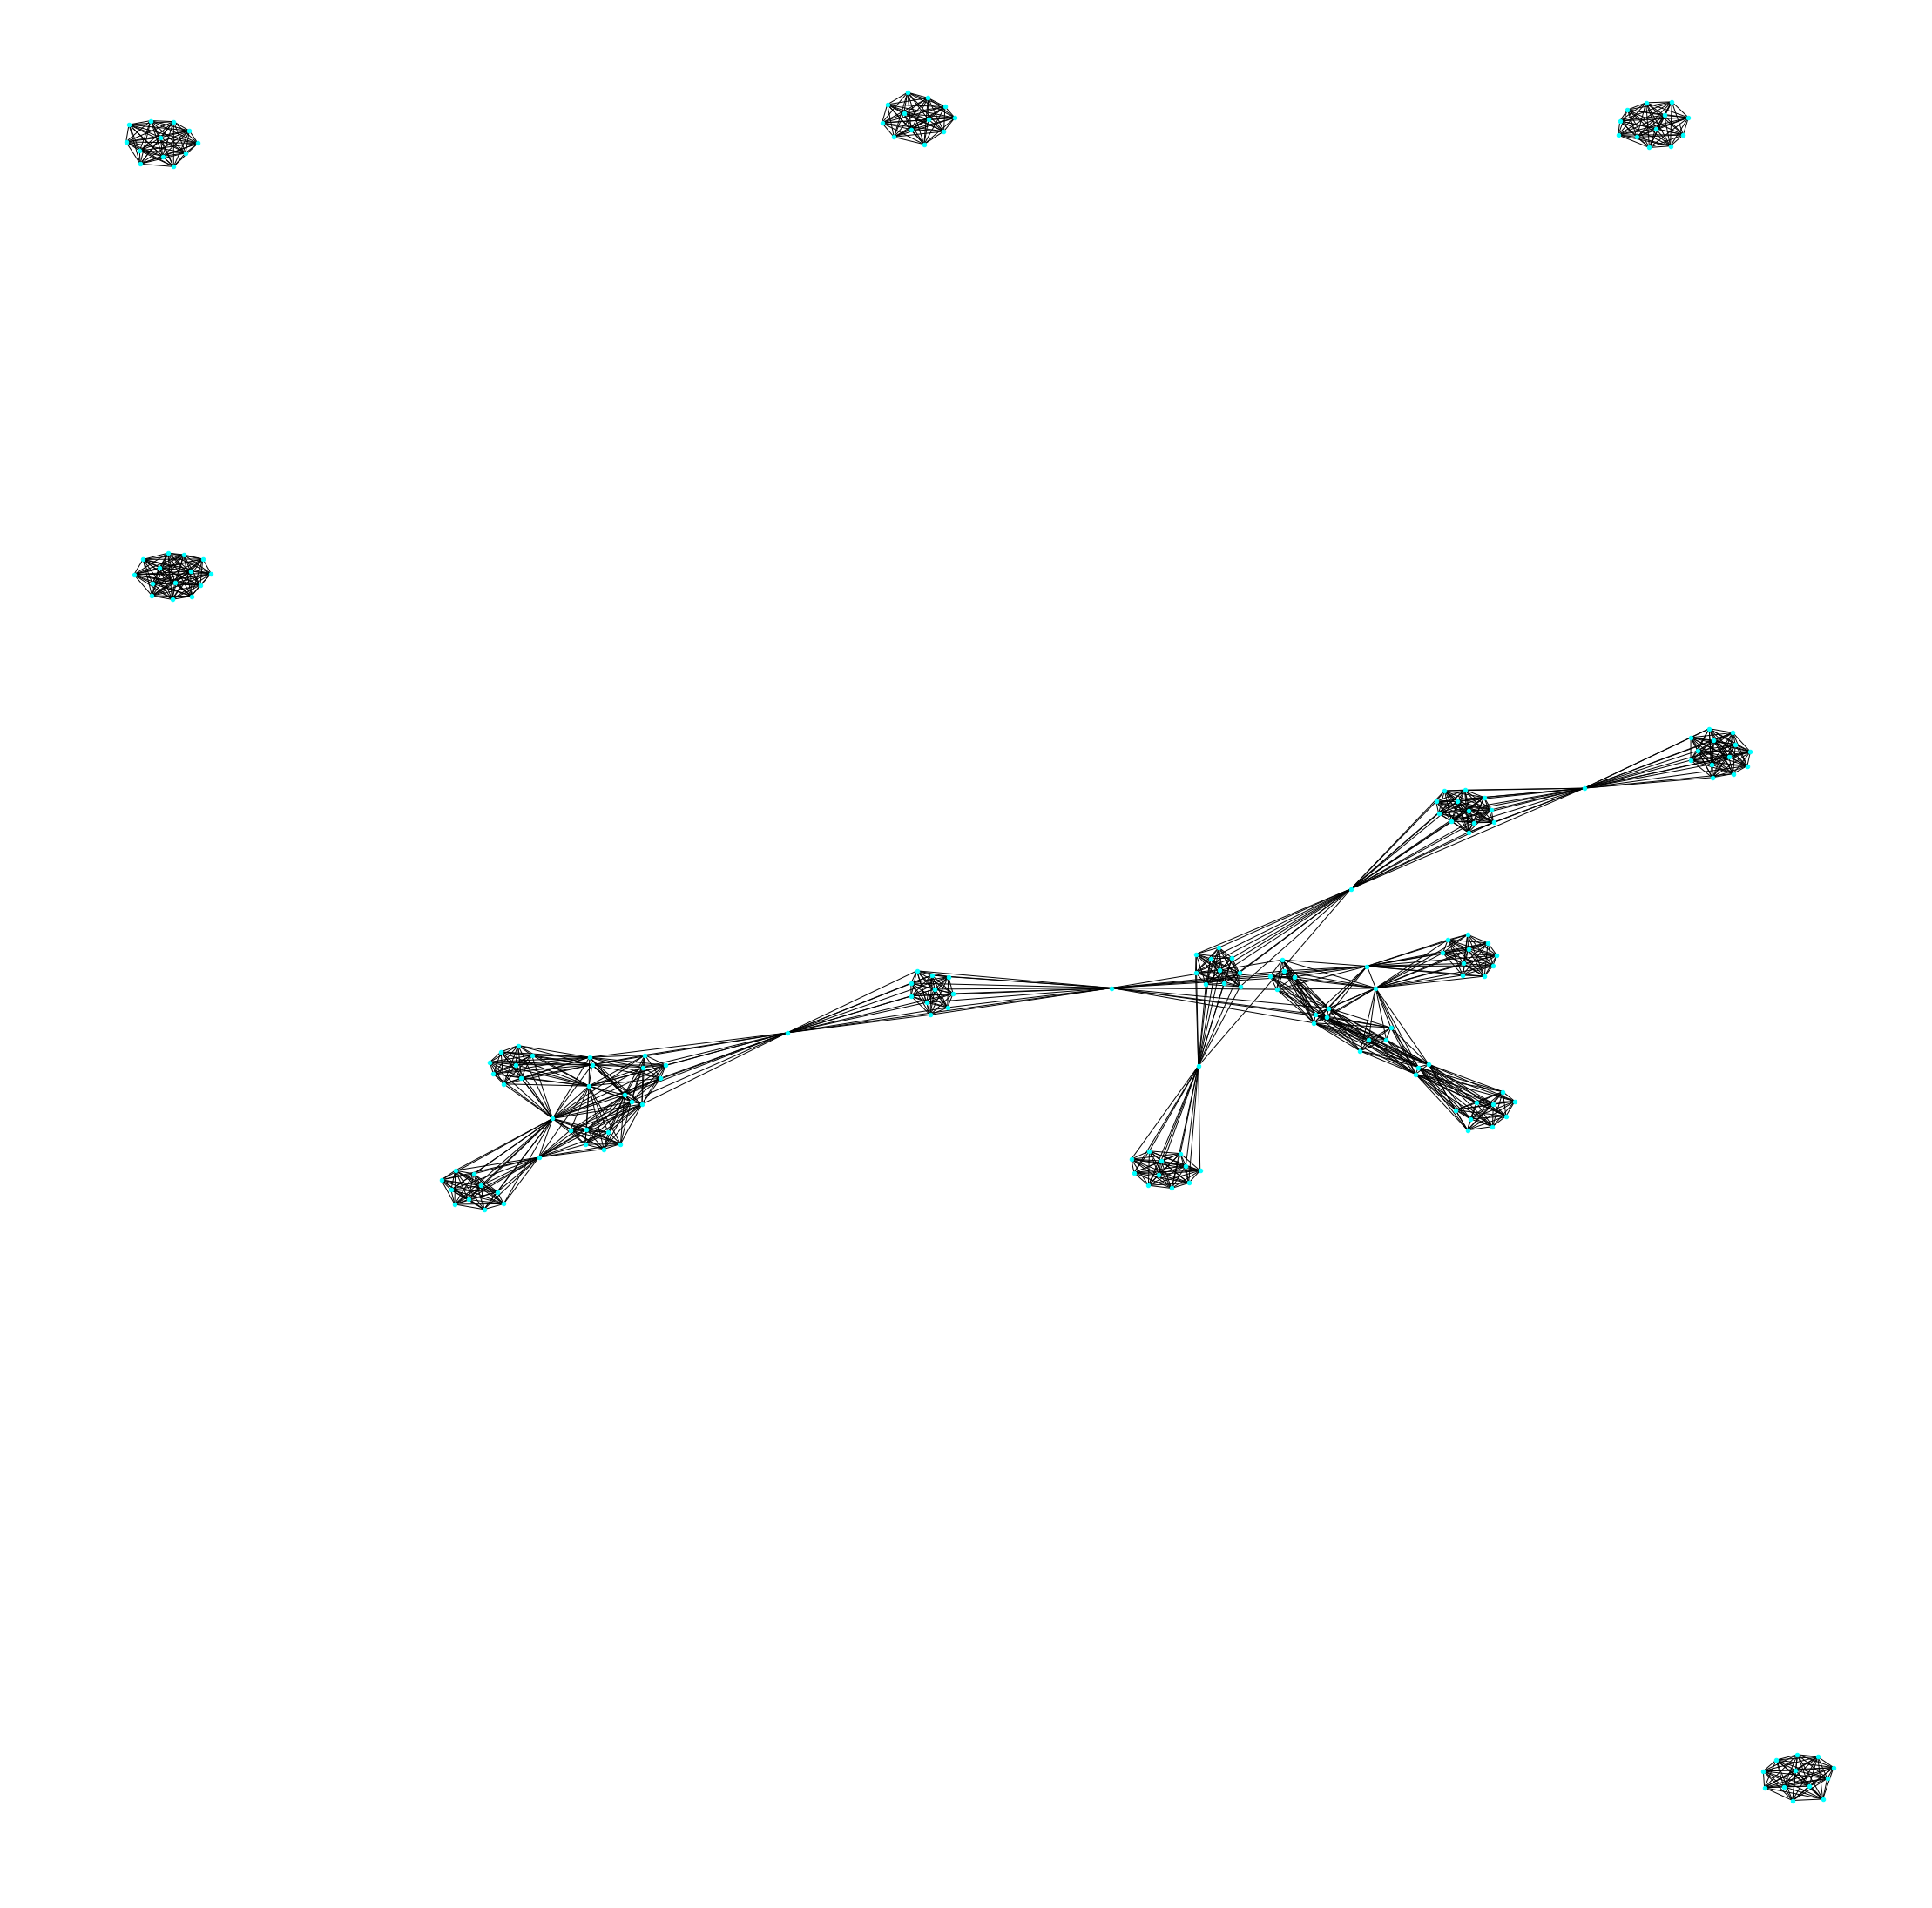

In [28]:
plt.figure(figsize=(30,30))
nx.draw(G, node_size=20, node_color='cyan')

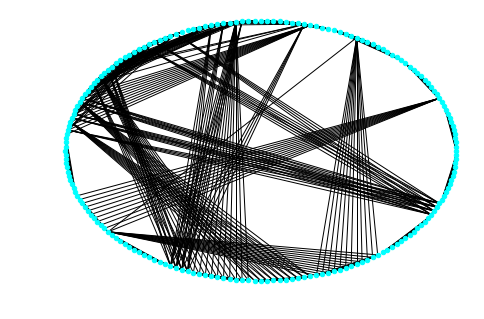

In [42]:
nx.draw_circular(G, node_size=20, node_color='cyan')

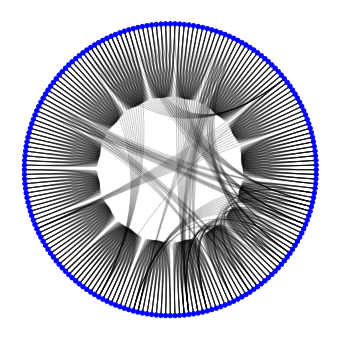

In [30]:
#Circos Plots
from nxviz import CircosPlot

c = CircosPlot(G)
c.draw()

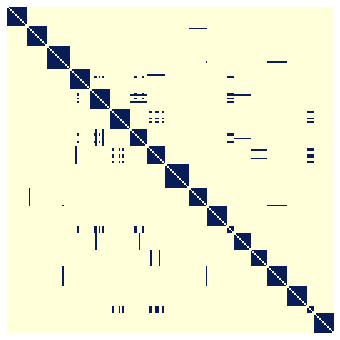

In [31]:
#Matrix Plots
from nxviz import MatrixPlot

m = MatrixPlot(G)
m.draw()

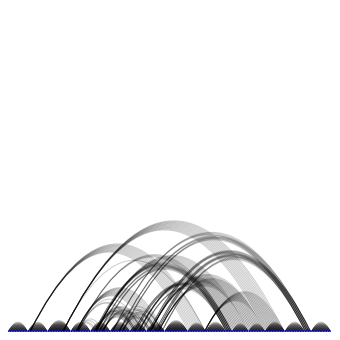

In [37]:
#Arc Plots
from nxviz import ArcPlot

a = ArcPlot(G)
a.draw()

## 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

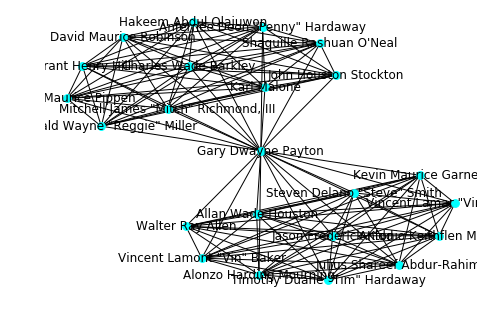

In [48]:
ego = nx.ego_graph(G, 'Gary Dwayne Payton', radius=1)

nx.draw_kamada_kawai(ego, node_size=60, node_color='cyan', with_labels=True)

## 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.

In [59]:
parts = cl.best_partition(G)
#parts is a Dictionnary
# '''# {'Adrian Delano Dantley': 0,  'Ernest "Ernie" Grunfeld': 0,  'Kenneth Alan "Kenny" Carr': 0, .. '''


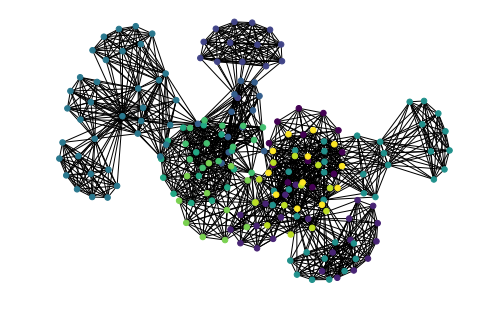

In [62]:
values = list(parts.values())
nx.draw_kamada_kawai(G, node_size=30, node_color=values)

## Bonus: Hierarchical Graphs

Thus far, we have analyzed graphs where the nodes represented individual players and the edges represented Olympic games that they have competed in together. We can analyze the data at a higher level if we wanted to, strippping out the players as entities and analyzing the data at the Games level. To do this, we would need to reconstruct the graph so that the *Games* field represents the entities and then use the player names as the edge criteria so that there would be an edge between two Olympic games if an player played in both of them. You already have the tools in your toolbox to be able to do this, so give it a try. 

### Create a graph with Games as the entities and then print out the graph statistics.

In [89]:
graph_df_games=df_to_graph(basketball, 'Games', 'Name')
# 2464 rows × 3 columns result

graph_df_games.sort_values(by='Name', ascending=False).head()

,Games_x,Games_y,Name
23,1992 Summer,1996 Summer,5
38,2008 Summer,2012 Summer,5
41,2012 Summer,2008 Summer,5
25,1996 Summer,1992 Summer,5
32,2004 Summer,2008 Summer,4


In [67]:
GG = nx.from_pandas_edgelist(graph_df_games, 'Games_x', 'Games_y')

In [93]:

print(nx.info(GG))
print(nx.density(GG))

Name: 
Type: Graph
Number of nodes: 13
Number of edges: 15
Average degree:   2.3077
0.19230769230769232


### Generate a network visualization of this graph using the layout of your choice.

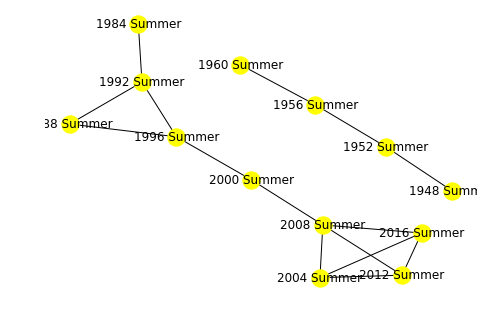

In [84]:
nx.draw_kamada_kawai(GG, node_color='yellow', with_labels=True)
